# Лабораторная работа № 4
# Подготовка обучающей и тестовой выборки, кросс-валидация и подбор гиперпараметров на примере метода ближайших соседей

 Цель лабораторной работы: изучение сложных способов подготовки выборки и подбора гиперпараметров на примере метода ближайших соседей.

 Выполнил: Мокренко Никита ИУ5-64

    1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
    2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
    3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
    4. Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью трех подходящих для задачи метрик.
    5. Постройте модель и оцените качество модели с использованием кросс-валидации. Проведите эксперименты с тремя различными стратегиями кросс-валидации.
    6. Произведите подбор гиперпараметра K с использованием GridSearchCV и кросс-валидации.
    7. Повторите пункт 4 для найденного оптимального значения гиперпараметра K. Сравните качество полученной модели с качеством модели, полученной в пункте 4.
    8. Постройте кривые обучения и валидации.


In [132]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

### 1. Выбор датасета

In [133]:
data = pd.read_csv('./data/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [134]:
data.shape

(303, 14)

### 2. Проверка датасета на наличие пропусков и категориальных признаков

In [135]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Категориальные признаки отсутствуют

In [136]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Пропуски отсутствуют

### 3. Деление выборки на обучающую и тестовую

In [137]:
from sklearn.model_selection import train_test_split

x_learn, x_test, y_learn, y_test = train_test_split(
    data.loc[:, data.columns != 'target'], data['target'],
    test_size=0.2, random_state=1) 

### 4. Обучение трех моделей knn для задачи классификации с тремя разными гиперпараметрами

In [138]:
from sklearn.neighbors import KNeighborsClassifier

cc1_1 = KNeighborsClassifier(n_neighbors=2)
cc1_1.fit(x_learn, y_learn)
target2_1 = cc1_1.predict(x_test)

cc1_2 = KNeighborsClassifier(n_neighbors=4)
cc1_2.fit(x_learn, y_learn)
target2_2 = cc1_2.predict(x_test)

cc1_3 = KNeighborsClassifier(n_neighbors=3)
cc1_3.fit(x_learn, y_learn)
target2_3 = cc1_3.predict(x_test)

### Оценка качества моделей с помощью разных метрик

In [139]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print('Метрика accuracy для 2 соседей', accuracy_score(y_test, target2_1))
print('Метрики precision/recall для 2 соседей:', 'Precision = %(pr)s / Recall = %(rec)s' % {
    'pr' : precision_score(y_test, target2_1), 'rec': recall_score(y_test, target2_1)})
print ('Метрика accuracy для 4 соседей:', accuracy_score(y_test, target2_2))
print('Метрики precision/recall для 4 соседей:', 'Precision = %(pr)s / Recall = %(rec)s' % {
    'pr' : precision_score(y_test, target2_2), 'rec': recall_score(y_test, target2_2)})
print ('Метрика accuracy для 3 соседей:', accuracy_score(y_test, target2_3))
print('Метрики precision/recall для 3 соседей:', 'Precision = %(pr)s / Recall = %(rec)s' % {
    'pr' : precision_score(y_test, target2_3), 'rec': recall_score(y_test, target2_3)})

Метрика accuracy для 2 соседей 0.4918032786885246
Метрики precision/recall для 2 соседей: Precision = 0.5 / Recall = 0.3870967741935484
Метрика accuracy для 4 соседей: 0.5409836065573771
Метрики precision/recall для 4 соседей: Precision = 0.5555555555555556 / Recall = 0.4838709677419355
Метрика accuracy для 3 соседей: 0.5737704918032787
Метрики precision/recall для 3 соседей: Precision = 0.5609756097560976 / Recall = 0.7419354838709677


### 5. Оценка качества модели с использованием кросс-валидации

In [140]:
from sklearn.model_selection import cross_val_score, cross_validate

col_x = data.loc[:, data.columns != 'target'].columns

scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), 
                        data[col_x], data['target'], cv=4)
scores, np.mean(scores)

(array([0.62337662, 0.63157895, 0.65333333, 0.65333333]), 0.6404055593529278)

In [141]:
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}

#использование cross_validate, которая позволяет использовать для оценки несколько метрик и возращает более детальную информацию
scores = cross_validate(KNeighborsClassifier(n_neighbors=5), 
                        data[col_x], data['target'], scoring=scoring, 
                        cv=3, return_train_score=False)
scores

{'fit_time': array([0.00433397, 0.00199556, 0.00209045]),
 'score_time': array([0.01717162, 0.01338077, 0.0120523 ]),
 'test_precision': array([0.62182853, 0.60270501, 0.66387408]),
 'test_recall': array([0.62376238, 0.6039604 , 0.66336634]),
 'test_f1': array([0.62181218, 0.60309602, 0.6568663 ])}

In [142]:
from sklearn.model_selection import KFold, RepeatedKFold, ShuffleSplit

#KFold
scoresKF = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         data[col_x], data['target'],
                         cv=KFold(n_splits=3))
scoresKF

array([0.16831683, 0.56435644, 0.45544554])

In [143]:
#RepeatedKfold
scoresRKF = cross_val_score(KNeighborsClassifier(n_neighbors=3), 
                         data[col_x], data['target'],
                         cv=RepeatedKFold(n_splits=3, n_repeats=2))
print ('Первое повторение:', scoresRKF[0:3])
print ('Второе повторение:', scoresRKF[3:6])

Первое повторение: [0.71287129 0.7029703  0.63366337]
Второе повторение: [0.59405941 0.7029703  0.56435644]


In [144]:
#ShuffleSplit
scoresSS = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         data[col_x], data['target'], 
                         cv=ShuffleSplit(n_splits=5, test_size=0.25))
scoresSS

array([0.61842105, 0.60526316, 0.52631579, 0.56578947, 0.56578947])

### 6. Подбор гиперпараметра методом решетчатого поиска

In [145]:
from sklearn.model_selection import GridSearchCV

n_range = np.array(range(2,12,1))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11])}]

In [146]:
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(x_learn, y_learn)

/usr/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [147]:
clf_gs.cv_results_

/usr/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You

{'mean_fit_time': array([0.0021769 , 0.00157676, 0.00152016, 0.00177093, 0.00169458,
        0.00152974, 0.00149455, 0.00151386, 0.0014935 , 0.00150123]),
 'std_fit_time': array([4.25104127e-04, 7.32699667e-05, 2.18285197e-05, 1.65132185e-04,
        1.46524432e-04, 6.03179969e-05, 2.55099412e-05, 4.21111198e-05,
        1.43252866e-05, 2.11860633e-05]),
 'mean_score_time': array([0.00296211, 0.00241556, 0.00214281, 0.00237513, 0.0023026 ,
        0.00220675, 0.00221477, 0.00220942, 0.00218534, 0.00225363]),
 'std_score_time': array([7.34321003e-04, 3.93312753e-04, 3.58753341e-05, 1.50502604e-04,
        8.41126961e-05, 4.45646100e-05, 5.02303531e-05, 3.54572597e-05,
        1.67090435e-05, 4.00053588e-05]),
 'param_n_neighbors': masked_array(data=[2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 2},
  {'n_neighbo

In [156]:
print('Лучшая модель: ', clf_gs.best_estimator_, '\n', 'Лучшее значение метрики: ', clf_gs.best_score_,
      '\n', 'Лучшее значение параметров: ', clf_gs.best_params_,sep = '')


Лучшая модель: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')
Лучшее значение метрики: 0.6776859504132231
Лучшее значение параметров: {'n_neighbors': 3}


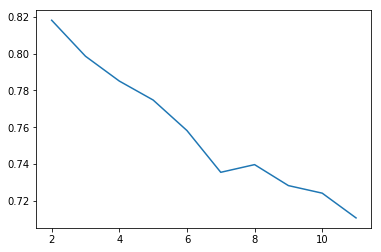

In [149]:
plt.plot(n_range, clf_gs.cv_results_['mean_train_score'])

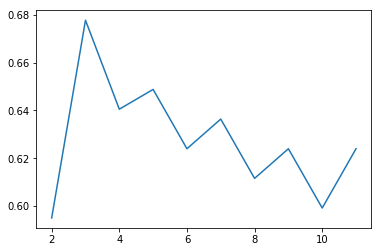

In [157]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

### 7. Обучение с гиперпараметром 3 уже было произведено.

### 8. Построение кривых обучения и валидации

In [151]:
from sklearn.model_selection import learning_curve, validation_curve

# Функции для посроения графиков из лекции:

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/usr/lib/python3.7/site-packages/matplotlib/pyplot.py'>

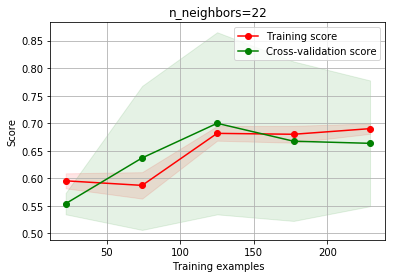

In [152]:
# Кривая обучения
plot_learning_curve(KNeighborsClassifier(n_neighbors=22), 'n_neighbors=22', 
                    x_learn, y_learn, cv=20)

<module 'matplotlib.pyplot' from '/usr/lib/python3.7/site-packages/matplotlib/pyplot.py'>

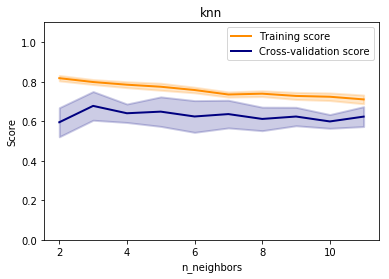

In [153]:
# Кривая валидации
plot_validation_curve(KNeighborsClassifier(), 'knn', 
                      x_learn, y_learn, 
                      param_name='n_neighbors', param_range=n_range, 
                      cv=StratifiedKFold(n_splits=5), scoring="accuracy")